<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/week6/Fisher_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisher’s Linear Discriminant (LDA) - Hands-on Notebook

Pattern Recognition, Week 6

## 1. Data Preparation

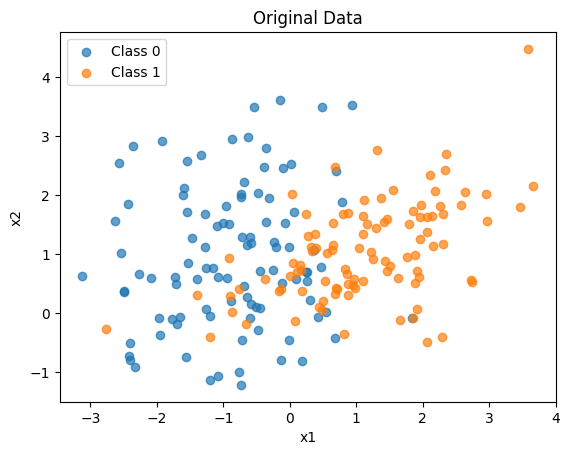

In [1]:
from sklearn.datasets import make_classification, load_iris
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2-class dataset (2D for visualization)
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           n_classes=2, random_state=42)

# Visualize
plt.scatter(X[y==0,0], X[y==0,1], label='Class 0', alpha=0.7)
plt.scatter(X[y==1,0], X[y==1,1], label='Class 1', alpha=0.7)
plt.title('Original Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## 2. Manual Fisher’s LDA (Binary Case)

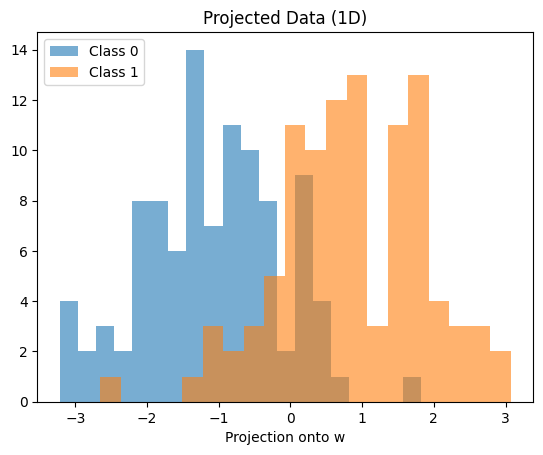

In [3]:
# Compute class means
mu0 = X[y==0].mean(axis=0)
mu1 = X[y==1].mean(axis=0)

# Compute within-class scatter
S0 = np.cov(X[y==0].T, bias=True)
S1 = np.cov(X[y==1].T, bias=True)
Sw = S0 + S1

# Compute optimal projection vector w
w = np.linalg.inv(Sw).dot(mu1 - mu0)

# Project data
z = X.dot(w)

# Plot histograms of projections
plt.hist(z[y==0], bins=20, alpha=0.6, label='Class 0')
plt.hist(z[y==1], bins=20, alpha=0.6, label='Class 1')
plt.title("Projected Data (1D)")
plt.xlabel("Projection onto w")
plt.legend()
plt.show()

## 3. Classification with Threshold

In [ ]:
# Threshold at midpoint between projected means
z0 = z[y==0]
z1 = z[y==1]
thresh = (z0.mean() + z1.mean()) / 2
y_pred = (z > thresh).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion matrix:\n", confusion_matrix(y, y_pred))

## 4. LDA using scikit-learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.hist(X_lda[y==0], bins=20, alpha=0.6, label='Class 0')
plt.hist(X_lda[y==1], bins=20, alpha=0.6, label='Class 1')
plt.title("sklearn LDA Projection")
plt.xlabel("LDA Component 1")
plt.legend()
plt.show()

print("LDA accuracy:", lda.score(X, y))

## 5. LDA on Multiclass Data (Iris)
We can use LDA to project to up to (n_classes - 1) dimensions.

In [ ]:
iris = load_iris()
X2, y2 = iris.data, iris.target
lda2 = LDA(n_components=2)
X2_lda = lda2.fit_transform(X2, y2)

plt.figure(figsize=(8,6))
for i, c in enumerate(iris.target_names):
    plt.scatter(X2_lda[y2==i,0], X2_lda[y2==i,1], label=c, alpha=0.7)
plt.title("Iris LDA Projection (2D)")
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.legend()
plt.show()

## 6. Comparison: LDA vs PCA vs Logistic Regression
Try projecting data with PCA and compare.
(For the curious: add code to fit PCA and logistic regression and plot boundaries.)